In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import pickle
import umap
import matplotlib.pyplot as plt
import seaborn as sns

import logging
logger = logging.getLogger()  # Logger

logger.setLevel("INFO")
#logging.info("Hello")

In [2]:
def write_pickle(path, obj):
    with open(path, "wb") as f:
        pickle.dump(obj, f)
        
def read_pickle(path):
    with open(path, "rb") as f:
        obj = pickle.load(f)
    return obj

In [3]:
#df_res = read_pickle(path="/mnt/DataRAID/melismail/Preprocessing/data/pickle_data/SVM/df_combined_res.pkl")
df_res = read_pickle(path="/mnt/DataRAID/melismail/Preprocessing/data/pickle_data/SVM/df_combined_res_6.pkl")

In [4]:
features = df_res["Features"].to_list()

In [5]:
# cluster
k = 6
clusters = KMeans(k, random_state = 42)
clusters_res = clusters.fit(features)

In [6]:
df_res["clusterid"] = clusters.labels_
df_res["Patient"] = [x.split("_")[0] for x in df_res["Img"]]
df_res

,Img,lbl,Features,clusterid,Patient
0,18QH2FGR4_482,non-cancer,"[0.07917861, 0.04241606, 0.0, 0.0, 0.0, 0.0, 0...",1,18QH2FGR4
1,18QH2FGR4_545,Basal,"[0.0, 0.017192785, 0.0017887925, 0.0, 0.004679...",1,18QH2FGR4
2,1C73PUTH4_332,Classical_CEACAM,"[0.21724284, 0.4482218, 0.049205918, 0.0, 0.04...",4,1C73PUTH4
3,1C73PUTH4_282,Classical_KRT7,"[0.053843882, 0.04542222, 0.05016656, 0.0, 0.0...",1,1C73PUTH4
4,1C73PUTH4_236,Basal,"[0.0, 0.7611621, 0.0014394429, 0.349693, 0.456...",2,1C73PUTH4
...,...,...,...,...,...
1647,ILH0VMVF5_772,non-cancer,"[0.042835027, 0.06437845, 0.021017602, 9.12680...",1,ILH0VMVF5
1648,ILH0VMVF5_290,Classical_KRT7,"[0.12609436, 0.6337724, 0.0, 0.009870741, 0.00...",3,ILH0VMVF5
1649,ILH0VMVF5_415,Classical_TFF1,"[0.2992572, 0.8306982, 0.0, 0.0, 0.05841289, 0...",5,ILH0VMVF5
1650,ILH0VMVF5_406,non-cancer,"[0.056304358, 0.5269085, 0.0, 0.062937684, 0.1...",5,ILH0VMVF5


In [7]:
# UMAP projection of feature vectors
reducer = umap.UMAP()
df = pd.DataFrame(features)
embedding = reducer.fit_transform(df)
embedding.shape

(1652, 2)

In [8]:
df_res["UMAP1"] =  [embedding[i, 0] for i in range(df_res.shape[0])]
df_res["UMAP2"] =  [embedding[i, 1] for i in range(df_res.shape[0])]

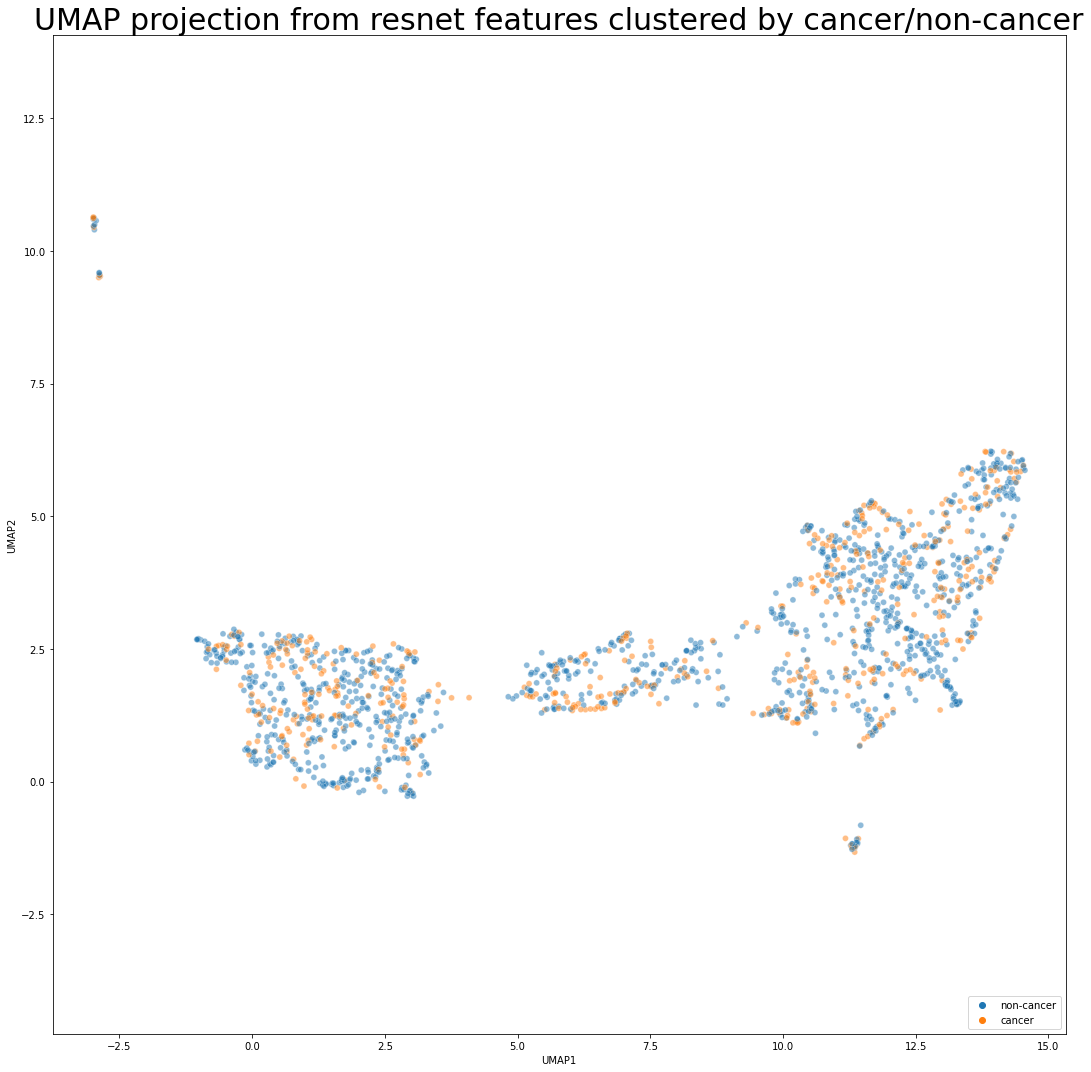

<Figure size 432x288 with 0 Axes>

In [9]:
fig = plt.figure(figsize=(15, 15))
sns.scatterplot(data=df_res, x="UMAP1", y="UMAP2", hue="lbl", cmap=sns.color_palette(), alpha=0.5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection from resnet features clustered by cancer/non-cancer', fontsize=30)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()
plt.savefig('UMAP_projection_resnet_feaftures_two_classes.png')

In [8]:
df_res["UMAP3"] =  [embedding[i, 0] for i in range(df_res.shape[0])]
df_res["UMAP4"] =  [embedding[i, 1] for i in range(df_res.shape[0])]

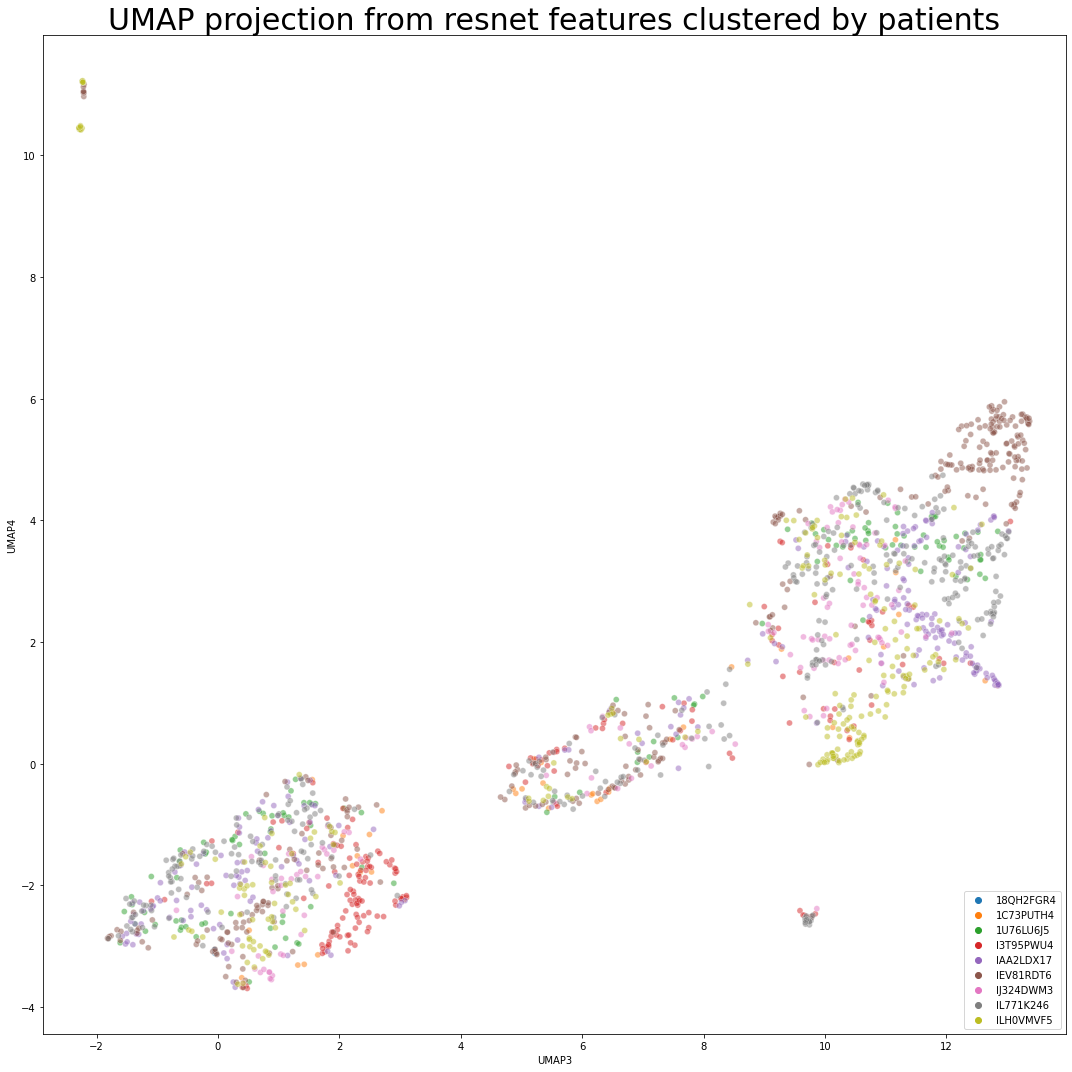

<Figure size 432x288 with 0 Axes>

In [9]:
fig = plt.figure(figsize=(15, 15))
sns.scatterplot(data=df_res, x="UMAP3", y="UMAP4", hue="Patient", cmap=sns.color_palette(), alpha=0.5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection from resnet features clustered by patients', fontsize=30)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()
plt.savefig('UMAP_projection_resnet_features_two_classes_patient.png')

In [8]:
df_res["UMAP5"] =  [embedding[i, 0] for i in range(df_res.shape[0])]
df_res["UMAP6"] =  [embedding[i, 1] for i in range(df_res.shape[0])]

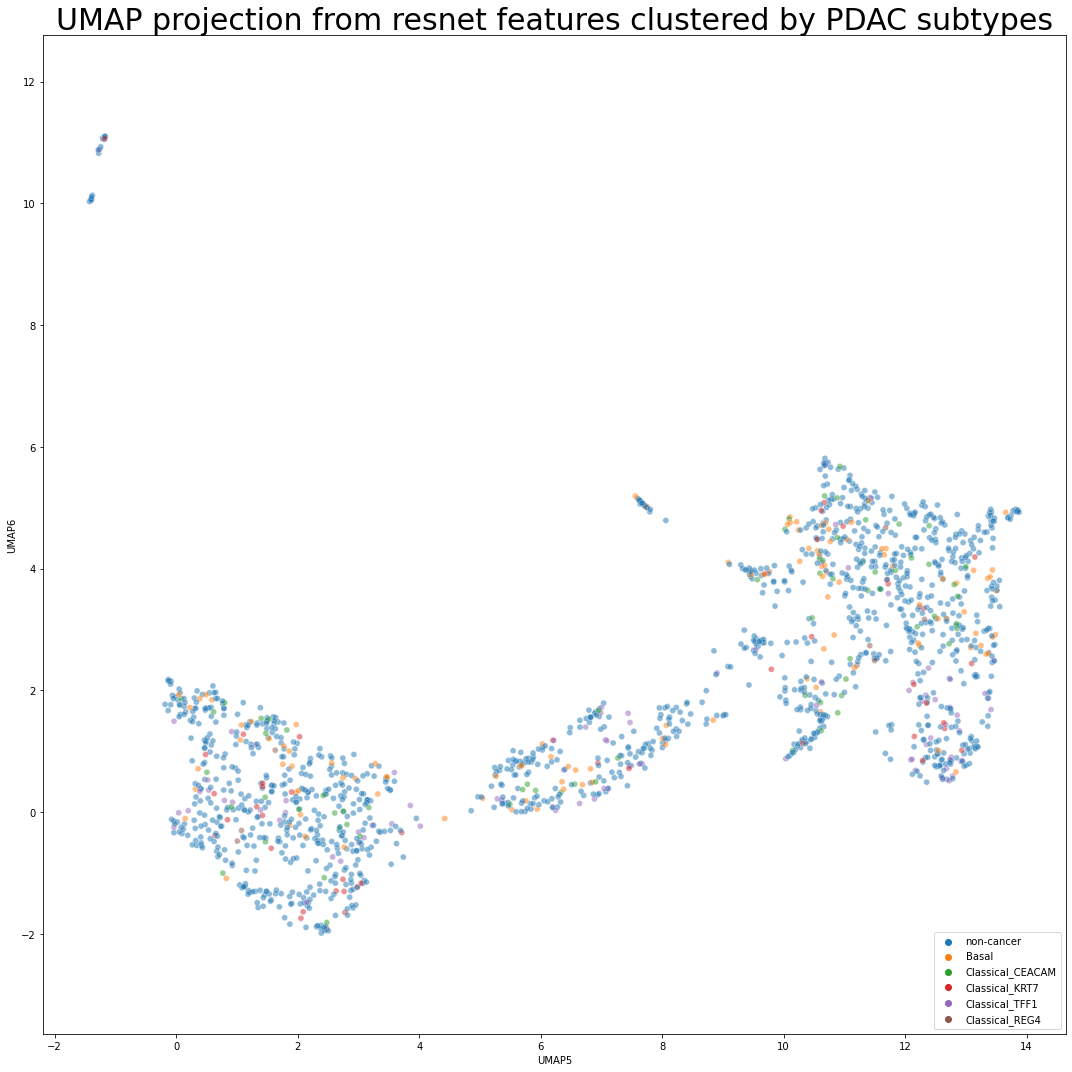

<Figure size 432x288 with 0 Axes>

In [9]:
fig = plt.figure(figsize=(15, 15))
sns.scatterplot(data=df_res, x="UMAP5", y="UMAP6", hue="lbl", cmap=sns.color_palette(), alpha=0.5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection from resnet features clustered by PDAC subtypes', fontsize=30)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()
plt.savefig('UMAP_projection_resnet_features_six_classes.png')